In [47]:
import numpy as np
from pylab import *
from matplotlib import pyplot as plt 
import time
import math

In [81]:
#三个树莓派的坐标值
rb1x = 4
rb1y = 4
rb2x = 7
rb2y = 4
rb3x = 7
rb3y = 7

In [57]:
#输入三个树莓派的距离，计算出WIFI信号坐标
def loc_calculate(r1,r2,r3):
    x12 = insec(rb1x,rb1y,r1,rb2x,rb2y,r2)
    x13 = insec(rb1x,rb1y,r1,rb3x,rb3y,r3)
    x23 = insec(rb2x,rb2y,r2,rb3x,rb3y,r3)
    x121 = x12[0]
    x122 = x12[1]
    x131 = x13[0]
    x132 = x13[1]
    x231 = x23[0]
    x232 = x23[1]
    p1 = choosepoint(x121,x122,x131,x132,x231,x232)
    p2 = choosepoint(x131,x132,x121,x122,x231,x232)
    p3 = choosepoint(x231,x232,x121,x122,x131,x132)
    p = (p1+p2+p3)/3
    print(p)
    return p

In [56]:
#根据三个圆的六个交点选出合适的三个交点
def choosepoint(a1,a2,b1,b2,c1,c2):
    d11 = math.sqrt((abs(a1[0]-b1[0]))**2 + (abs(a1[1]-b1[1]))**2)
    d12 = math.sqrt((abs(a1[0]-b2[0]))**2 + (abs(a1[1]-b2[1]))**2)
    d13 = math.sqrt((abs(a1[0]-c1[0]))**2 + (abs(a1[1]-c1[1]))**2)
    d14 = math.sqrt((abs(a1[0]-c2[0]))**2 + (abs(a1[1]-c2[1]))**2)
    d1 = d11 + d12 + d13 + d14
    d21 = math.sqrt((abs(a2[0]-b1[0]))**2 + (abs(a2[1]-b1[1]))**2)
    d22 = math.sqrt((abs(a2[0]-b2[0]))**2 + (abs(a2[1]-b2[1]))**2)
    d23 = math.sqrt((abs(a2[0]-c1[0]))**2 + (abs(a2[1]-c1[1]))**2)
    d24 = math.sqrt((abs(a2[0]-c2[0]))**2 + (abs(a2[1]-c2[1]))**2)
    d2 = d21 + d22 + d23 + d24
    if d1 <= d2:
        return a1
    else:
        return a2

In [72]:
# 两圆求交点
def insec(x,y,r1,a,b,r2):
    R = r1
    S = r2
    d = math.sqrt((abs(a-x))**2 + (abs(b-y))**2)
    if d > (R+S) or d < (abs(R-S)):
        print ("Two circles have no intersection")
        #两圆相离
        if d > (R+S):
            x3 = (x*S+a*R)/(S+R)
            y3 = (y*R+b*S)/(S+R)
        #两圆包含
        elif S < R:
            x3 = a + (R+S-d)*(a-x)/(2*d)
            y3 = b + (R+S-d)*(b-y)/(2*d)
        elif S > R:
            x3 = x + (R+S-d)*(x-a)/(2*d)
            y3 = y + (R+S-d)*(y-b)/(2*d)
        else:
            print("ERROR in logic")
        
        c1=np.array([x3, y3])
        c2=np.array([x3, y3])
        return c1,c2
    else:
        A = (R**2 - S**2 + d**2) / (2 * d)
        h = math.sqrt(R**2 - A**2)
        x2 = x + A * (a-x)/d
        y2 = y + A * (b-y)/d
        x3 = round(x2 - h * (b - y) / d,2)
        y3 = round(y2 + h * (a - x) / d,2)
        x4 = round(x2 + h * (b - y) / d,2)
        y4 = round(y2 - h * (a - x) / d,2)
        print (x3, y3)
        print (x4, y4)
        c1=np.array([x3, y3])
        c2=np.array([x4, y4])
        return c1,c2

In [82]:
#可视化模块
def loc_show(a,b,c = -1, d = -1, e = -1, f = -1):
    figure(figsize=(6,6), dpi=80)
    plt.title("WIFI Location Detection") 
    plt.xlabel("x axis") 
    plt.ylabel("y axis")
    plt.plot(rb1x,rb1y,"ob",label="raspberry1") 
    plt.plot(rb2x,rb2y,"og",label="raspberry2") 
    plt.plot(rb3x,rb3y,"or",label="raspberry3") 
    plt.plot(a,b,"*r",label="wifi1")
    if(c!=-1):
        plt.plot(c,d,"*g",label="wifi2")
    if(e!=-1):
        plt.plot(e,f,"*b",label="wifi3")
    xlim(0,10)
    ylim(0,10)
    plt.legend()
    plt.show()
    print(i)
    time.sleep(1)

5.5 4.0
5.5 4.0
Two circles have no intersection
Two circles have no intersection
[4.644712   1.72804534]


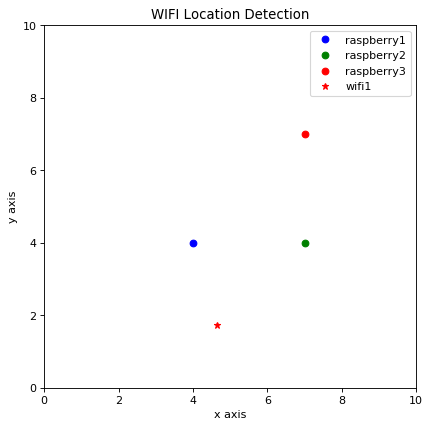

5


In [79]:
p = loc_calculate(1.5,1.5,10)
loc_show(p[0],p[1])